# **EDA project**

# Kaggle Dataset:
https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [ ]:
#columns explanation
#https://rstudio-pubs-static.s3.amazonaws.com/613583_e4712193c51b42f4a30f69aeb08af095.html

## **Introduction:**


> The dataset for the following EDA project containing **hotel booking** for 2 hotels - Recort hotel and City hotel, Both hotels are located in Portugal, and comprehend bookings due to arrive between the 1/7/2015 and the 31/08/2017.


> The dataset contains booking information for a City hotel and a Resort hotel, and includes information such as: when the booking was made, length of stay, the number of adults, cancellations, Where the guests come from, ADR, etc.


> This project **focuses** on management (and not marketing) such as: internal management, capacity and revenue management.
due to the above, most of the work done on the dataset was done in neutralizing the actual cancellations and focused on the orders that were executed.



> In addition, we will test the differences between the 2 hotels, therefore, we will separate the data for each hotel.




##**Project Overview:**

 

**Work steps**:

1. First view and General info
2. Clean the data / Nulls 
3. Etiting columns
4. try to answer the EDA questions that interest us 
5. try to find corelation between columns
6. T-test

##Questions we may wants to ask: 


1.  How many bookings were canceled?     DONE

2. How long do people stay at the hotels?(per hotel)-  DONE

3. PPP- price per person V.s. total stay - DONE

4. How does the price per night vary over the year?(per hotel)- DONE
 
   (4.1) T test : price per weekend vs week?

5.  Where do the guests come from? (did the Location affected on price? DONE

   (5.1) Question 6.1: What is the ppp of those 8 rare counties?DONE

   (5.2) Where did peaople come from per hotel? is it the same 8 countries?DONE

   (5.3) Is there any country - from both of hotels- that paid constantly high price?DONE


##**Import libraries**

In [ ]:
def csv_drive_path_generatoer(url:str):
 '''
 Helping in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : pandas.DataFrame
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path


drive_path = csv_drive_path_generatoer('https://drive.google.com/file/d/1eGNMj65ZZhAyikhJQDtY26EQibylymQk/view?usp=sharing')
print(drive_path)
#df = pd.read_csv(drive_path,index_col='id')
#df.head()

https://drive.google.com/uc?export=download&id=1eGNMj65ZZhAyikhJQDtY26EQibylymQk


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from datetime import datetime
%matplotlib inline
import seaborn as sns

## **DataFrame**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=3533f8bcade3e7a881f9f16ac2f451d8271cfde84edac2ec4cb105de70010287
  Stored in directory: /tmp/pip-ephem-wheel-cache-800wmsi5/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
hotel_full= pd.read_csv("hotel_bookings.csv",encoding='utf-8-sig')
hotel=hotel_full
hotel.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]

## **1. first view and General information about the data**

In [ ]:
print(f"The DataFrane has {hotel_full.shape[0]} row and {hotel_full.shape[1]} columns.")

The DataFrane has 119390 row and 32 columns.


In [ ]:
hotel_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# What is the weight of each hotel in the dataset
resort = hotel[hotel['hotel']=='Resort Hotel']
city =  hotel[hotel['hotel']=='City Hotel']
print('Resort hotel has: ', resort.shape[0], 'row. observations:',round(resort.shape[0]/hotel.shape[0],3)*100,"%.")
print('City hotel has: ', city.shape[0], ' row. observations:', round(city.shape[0]/hotel.shape[0],3)*100,"%.")

Resort hotel has:  40060 row. observations: 33.6 %.
City hotel has:  79330  row. observations: 66.4 %.


In [ ]:
hotel_full.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## **2. Column Cleaning**

In [ ]:
# Rename column to a shorter name
hotel.rename(columns={"arrival_date_year": "arrival_year",
                      "arrival_date_month": "arrival_month",
                      "arrival_date_week_number":"arrival_WW",
                      "arrival_date_day_of_month":"arrival_day_month"},
              inplace=True)

In [ ]:
# Check before delete "reservation status" column:
# "reservation_status" is compatible with column: "is canceled" 
x=(hotel.is_canceled==1)
y=hotel.reservation_status!='Check-Out'
(x==y).sum()

119390

In [ ]:
# Remove columns that  not in use -  Irrelevant to the questions ask
# (the original dataset must be run again before running again)
column_to_remove = ['meal', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                    'previous_cancellations','previous_bookings_not_canceled','reserved_room_type',
                    'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'customer_type',
                    'required_car_parking_spaces', 'total_of_special_requests','reservation_status']

hotel.drop(column_to_remove, axis='columns', inplace=True)
hotel.head(1)

hotel  is_canceled  ...  adr  reservation_status_date
0  Resort Hotel            0  ...  0.0               2015-07-01

[1 rows x 17 columns]

In [ ]:
#reduced from 32 to 17:
hotel.shape

(119390, 17)

DataFrame Index

 

*   Out of 32 columns of the original dataset, we deleted the columns that were not relevant to the questions asked and stayed with 17 columns

* Resort hotel has 40,060 row which makes up about 34% of the dataset.
and city hotel has 79,330 row  which makes up about 66% of the dataset

## **3. view after Columns Cleaning**

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   lead_time                119390 non-null  int64  
 3   arrival_year             119390 non-null  int64  
 4   arrival_month            119390 non-null  object 
 5   arrival_WW               119390 non-null  int64  
 6   arrival_day_month        119390 non-null  int64  
 7   stays_in_weekend_nights  119390 non-null  int64  
 8   stays_in_week_nights     119390 non-null  int64  
 9   adults                   119390 non-null  int64  
 10  children                 119386 non-null  float64
 11  babies                   119390 non-null  int64  
 12  country                  118902 non-null  object 
 13  assigned_room_type       119390 non-null  object 
 14  depo

In [ ]:
hotel.isnull().sum()
#need check: Nan for children, country,agent, company

hotel                        0
is_canceled                  0
lead_time                    0
arrival_year                 0
arrival_month                0
arrival_WW                   0
arrival_day_month            0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     4
babies                       0
country                    488
assigned_room_type           0
deposit_type                 0
adr                          0
reservation_status_date      0
dtype: int64

In [ ]:
# Describe for columns
hotel.describe(include='all')
hotel.describe()

is_canceled      lead_time  ...         babies            adr
count  119390.000000  119390.000000  ...  119390.000000  119390.000000
mean        0.370416     104.011416  ...       0.007949     101.831122
std         0.482918     106.863097  ...       0.097436      50.535790
min         0.000000       0.000000  ...       0.000000      -6.380000
25%         0.000000      18.000000  ...       0.000000      69.290000
50%         0.000000      69.000000  ...       0.000000      94.575000
75%         1.000000     160.000000  ...       0.000000     126.000000
max         1.000000     737.000000  ...      10.000000    5400.000000

[8 rows x 11 columns]

##**pandas Profiling Report**

In [ ]:
#profile = ProfileReport(hotel_full)
#profile.to_file(output_file='hotelFULLprofile.html')
#profile.to_notebook_iframe()

In [ ]:
profile = ProfileReport(df = hotel)
profile.to_file(output_file='hotelCLEANprofile.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


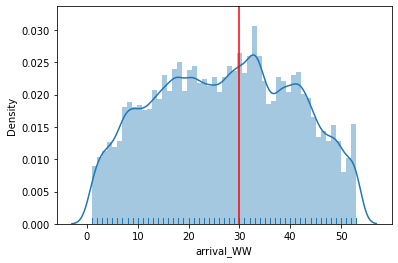

In [ ]:
#WW=31-35 is Agust month
sns.distplot(hotel['arrival_WW'], bins=53, rug=True)
plt.axvline(30, 0,1, c='r')
plt.show();

 **Duplicate**
 
 The decition is NOT to remove **duplicate**. Most of rows will be reduced after removing canceled reservation. The fact that each row is a singel reservation in hotel- is make sence to have duplicate rows.



In [ ]:
# duplicate rows before removung all canceld reservations
hotel[hotel.duplicated()].shape

(34315, 17)

## **4. Row cleaning - data / Nulls**

In [ ]:
#Nulls - cleaning the data / replace
#    replace  Nulls in children column to 0
#    replace Nulls in countrycolumn to Other
replacements= {'children' : 0.0, 'country': 'Other'}
hotel.fillna(replacements,inplace=True)

#remove row with total person is zero
no_one = (hotel.children == 0) & (hotel.adults == 0) & (hotel.babies == 0) #remove reservation with no people
hotel=hotel[~no_one]

#extream value- 5400  was cenceled, -6 is negative
hotel.adr.replace([5400,-6.38],0,inplace=True)

#Remove row with adr zero and not stay in hotel for night
no_night = (hotel.adr == 0) & (hotel.stays_in_weekend_nights == 0) & (hotel.stays_in_week_nights == 0)
hotel=hotel[~no_night]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## **General info - new DataFrame**



In [ ]:
# after removing row we stay with: Compared to the original data

print(f"We removed {hotel_full.shape[0]-hotel.shape[0]} rows which reduces the data by: {round((1-(hotel.shape[0]/hotel_full.shape[0]))*100,3)}%.")
print(f"The now DataFrane has {hotel.shape[0]} row and {hotel.shape[1]} columns.")

We removed 825 rows which reduces the data by: 0.691%.
The now DataFrane has 118565 row and 17 columns.


*  Out of 119,390 row of the original dataset, we clean and deleted the rows that contained missing or irrational data and stayed with 118565  rows
whose value is 0.7 % of the original dataset.

In [ ]:
## NEED to explain duplicate with profile

#Etiting  columns

In [ ]:
#create another colum with arrival date in order to compare with reservation_status_date (try to understand if peaople arrived & leeved in the same day)
day = hotel.arrival_day_month.to_list()
month = hotel.arrival_month.to_list()
year = hotel.arrival_year.to_list()
arival_date = []
for i in range(len(year)):
  date= str(day[i]) +' '+ str(month[i])+' ' + str(year[i])
  date = datetime.strptime(date, "%d %B %Y")
  arival_date.append(date)
hotel['attend_to_arrive'] = arival_date
hotel.head(1) 

hotel  is_canceled  ...  reservation_status_date  attend_to_arrive
2  Resort Hotel            0  ...               2015-07-02        2015-07-01

[1 rows x 18 columns]

# **5. Adding columns:**


*   total_stay - total nights that guests stay at the hotel (weekend + week)
*   total_guest - total number of guest staying at the hotel per reservation (adults+children+babies)
*   ppp - price per person (ADR/total_guest)



In [ ]:
#add new column with month as number for next calculation- need x axis with month as num

import calendar 
monthes=dict((month, index) for index, month in enumerate(calendar.month_name) if month)
hotel['month']=hotel['arrival_month']
hotel['month'].replace(monthes, inplace=True)
hotel.head(1)

hotel  is_canceled  ...  attend_to_arrive  month
2  Resort Hotel            0  ...        2015-07-01      7

[1 rows x 19 columns]

In [ ]:
# how long the people stay from day to arrive till reservation status date
# Adding a column of total nights that guests stay at the hotel (weekend + week)
duration=hotel.stays_in_weekend_nights + hotel.stays_in_week_nights
hotel['total_stay'] = duration

#total guest per reservation
# Adding a column of  total number of guest staying at the hotel per reservation
total_guest =hotel.adults + hotel.children + hotel.babies
hotel['total_guest']= total_guest

#price per person
ppp= hotel.adr/hotel.total_guest
hotel['ppp']=ppp


hotel.head(2)
hotel.shape

(118565, 22)

#**Question 1:** **How many bookings were canceled?**

In [ ]:
hotel_canceled =  hotel[(hotel['is_canceled']==1)]
print(f"The number of cancellations is {hotel_canceled.shape[0]}, which is {round(hotel_canceled.shape[0]/hotel.shape[0],3)*100}% of all orders in the dataset")

The number of cancellations is 44176, which is 37.3% of all orders in the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '[%]')

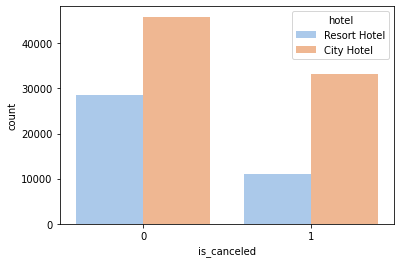

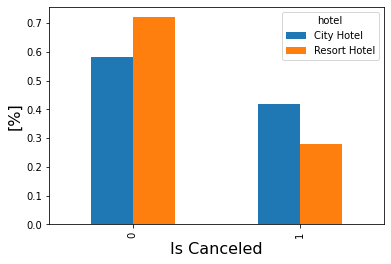

In [ ]:
sns.countplot(hotel['is_canceled'], hue='hotel', data= hotel, palette="pastel");
hotel_canceled_precent = pd.crosstab(hotel['is_canceled'], hotel['hotel'],normalize='columns').plot(kind='bar')
hotel_canceled_precent.set_xlabel("Is Canceled",fontsize=16)
hotel_canceled_precent.set_ylabel('[%]', fontsize=16)
#plt.show();

In [ ]:
#check the bar above- for cityi hotel is 41% canceled
(city[city['is_canceled']==1].is_canceled.sum()/city.shape[0])*100

41.72696331778646

#**seperat hotels into 2 Dataframe:**

**Since we decided to focus on the internal management of the hotel - we will ignore cancellations**

In [ ]:
#Hotel resevation- ONLY arrived, no cancalation
hotel_clean =  hotel[(hotel['is_canceled']==0)]
r=(1-(hotel_clean.shape[0]/hotel.shape[0]))*100
print(f'After removing the canceled reservation we have: {hotel_clean.shape[0]} rows, we reduced by {r} %')

After removing the canceled reservation we have: 74389 rows, we reduced by 37.25888753004681 %


In [ ]:
resort_clean = hotel_clean[hotel_clean['hotel']=='Resort Hotel']
city_clean =  hotel_clean[hotel_clean['hotel']=='City Hotel']
print('Resort hotel has: ', resort_clean.shape[0], ' observations',round(resort_clean.shape[0]/hotel_clean.shape[0],3)*100,"%")
print('City hotel has: ', city_clean.shape[0], ' observations', round(city_clean.shape[0]/hotel_clean.shape[0],3)*100,"%")

Resort hotel has:  28556  observations 38.4 %
City hotel has:  45833  observations 61.6 %


In [ ]:
#less duplicate after cleaning:
hotel_clean[hotel_clean.duplicated()].shape

(13805, 22)

##corelation

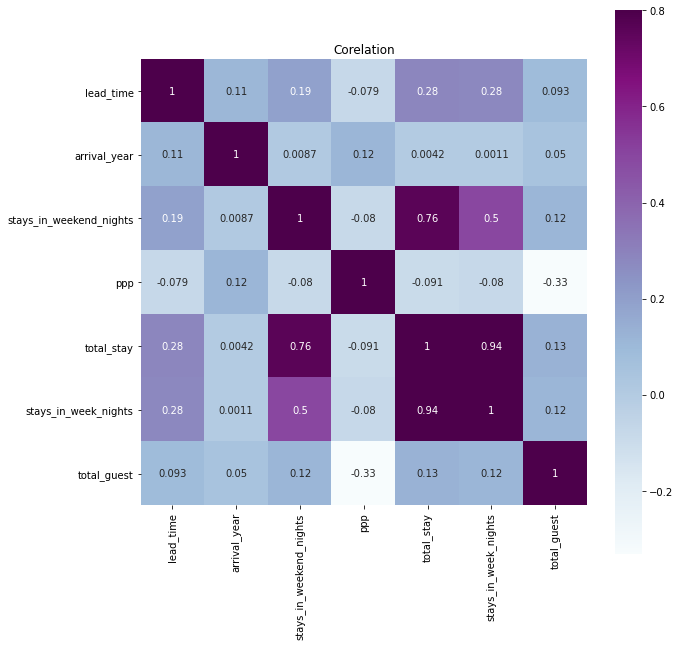

In [ ]:
partial_columns =hotel_clean[['lead_time','arrival_year','stays_in_weekend_nights','arrival_month','ppp',
                              'total_stay','stays_in_week_nights', 'total_guest']]
matrix = partial_columns.corr()
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('Corelation')
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True);

#PPP vs Total stay
#ppp vs lead time

First view: PPP vs Lead_time

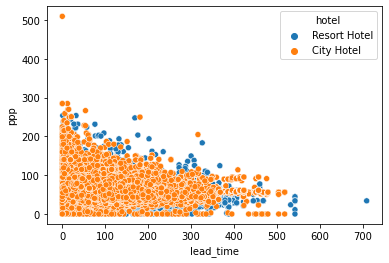

In [ ]:
relevant = hotel_clean[['ppp', 'lead_time','hotel']]
sns.scatterplot(x='lead_time', y='ppp', data=relevant, hue='hotel')


#**Question 2:** How long do people stay at the hotels?(per hotel)

In [ ]:
city_clean.tail(2)

hotel  is_canceled  lead_time  ...  total_stay total_guest   ppp
119388  City Hotel            0        109  ...           7         2.0  52.2
119389  City Hotel            0        205  ...           9         2.0  75.6

[2 rows x 22 columns]

In [ ]:
#calculate the amount of total stay night and the % of specific number of night (total stay) from all booking
#for resoret hotel
data_r=(resort_clean["total_stay"].value_counts()) # r for resort
num_nights_r = data_r.index
num_booking_r = data_r.values
rel_booking_r = (num_booking_r /sum(num_booking_r))*100 # the relative %

#for city hotel
data_c=(city_clean["total_stay"].value_counts())
num_nights_c = data_c.index
num_booking_c = data_c.values
rel_booking_c = (num_booking_c /sum(num_booking_c))*100

In [ ]:
#create 1 datafram for both hotel
res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_r,
                           "rel_num_bookings": rel_booking_r})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_c,
                           "rel_num_bookings": rel_booking_c})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)


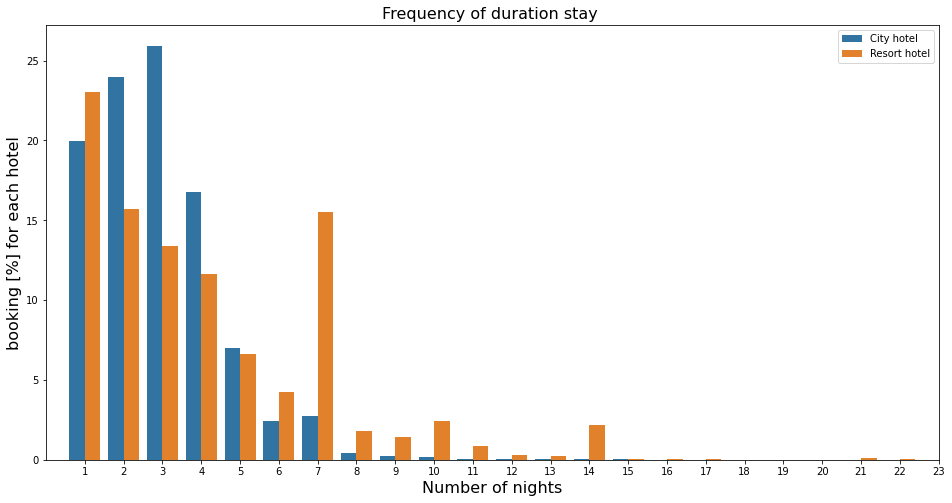

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x ="num_nights", y = "rel_num_bookings", hue="hotel",
            data=nights_data,hue_order = ["City hotel", "Resort hotel"],)

plt.title("Frequency of duration stay ", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("booking [%] for each hotel", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(-1,22)
plt.show()


**City Hotel** 

had more rservation for 1-4 nights.

the price being more atractiv for 3 nights, we can see the increas of booking % at amount of 3 nights.

**Resort Hotel** 

most of reservation between 1-4 day. in addition it may be possible that resort offer sprcial price for 7 nights (we can see in next chart)



#**Question 3:** **PPP- price per person V.s. total stay**

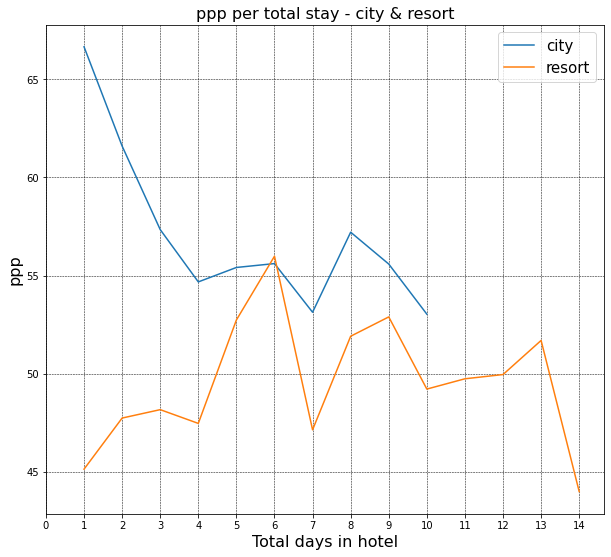

In [ ]:
city=city_clean[['ppp', 'total_stay']].groupby('total_stay').agg({'ppp':['mean', 'sum', 'count']})
city=city[city[('ppp','count')]>50][('ppp','mean')]
resort=resort_clean[['ppp', 'total_stay']].groupby('total_stay').agg({'ppp':['mean', 'sum', 'count']})
resort=resort[resort[('ppp','count')]>50][('ppp','mean')] # for good statistic
fig = plt.figure(figsize = (10, 9))
city.plot( label = 'city', kind='line')
resort.plot( label = 'resort')
plt.ylabel("ppp", fontsize=16)
plt.xlabel("Total days in hotel", fontsize=16)
plt.title('ppp per total stay - city & resort', fontsize=16)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,15,1))
plt.legend(prop={'size': 15});

we want to see the change of price for night per person, accordingly to period of time in the hotel.
'City' hotel reduce the price between 1-4 dayes, and above 4 days the price is stable.
Resort hotel has lower price than 'City'and stable price regardless of the time of stay
elevation in  price maybe due to room type.

elevation in ppp was on weekend- resort hotel

#**Question 4:** **How does the PPP per night vary over the year? (per hotel)**

chart with price change per monthe - per hotel

In [ ]:
hotel_clean.head(1)

hotel  is_canceled  lead_time  ...  total_stay total_guest   ppp
2  Resort Hotel            0          7  ...           1         1.0  75.0

[1 rows x 22 columns]

RESORT HOTEL

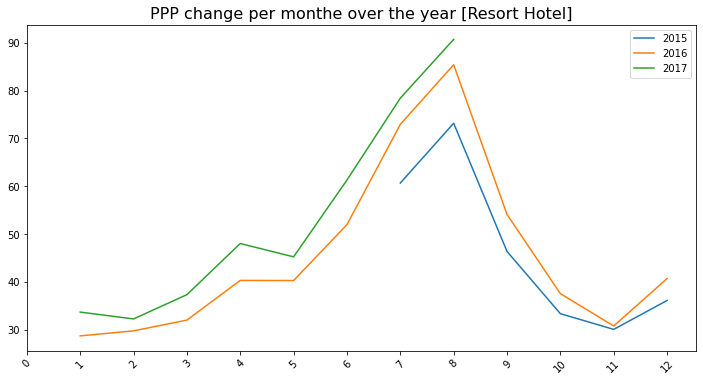

In [ ]:
resort_price= resort_clean[['ppp','arrival_month','arrival_year','month' ]]
ppp_2015r= resort_price[resort_price['arrival_year']==2015].groupby('arrival_month').mean().sort_values('month')
ppp_2016r= resort_price[resort_price['arrival_year']==2016].groupby('arrival_month').mean().sort_values('month')
ppp_2017r= resort_price[resort_price['arrival_year']==2017].groupby('arrival_month').mean().sort_values('month')

fig = plt.subplots( sharex=True,figsize=(12, 6))

mean_2015r=ppp_2015r.ppp
ppp_2015r = plt.plot(ppp_2015r.month , mean_2015r, label=2015)

mean_2016r=ppp_2016r.ppp
ppp_2016r = plt.plot(ppp_2016r.month, mean_2016r, label=2016)

mean_2017r=ppp_2017r.ppp
ppp_2017r = plt.plot(ppp_2017r.month, mean_2017r, label=2017)

plt.legend()
plt.title("PPP change per monthe over the year [Resort Hotel]", fontsize=16)
plt.xticks(np.arange(0,13,1))

plt.xticks(rotation=45);


CIYT HOTEL

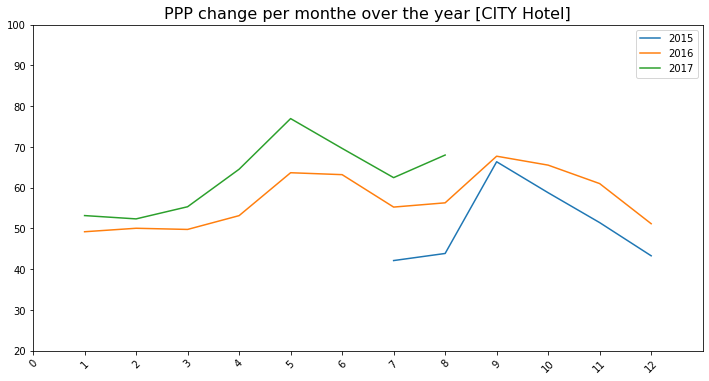

In [ ]:
city_price= city_clean[['ppp','arrival_month','arrival_year','month' ]]
ppp_2015c= city_price[city_price['arrival_year']==2015].groupby('arrival_month').mean().sort_values('month')
ppp_2016c= city_price[city_price['arrival_year']==2016].groupby('arrival_month').mean().sort_values('month')
ppp_2017c= city_price[city_price['arrival_year']==2017].groupby('arrival_month').mean().sort_values('month')

fig = plt.subplots( sharex=True,figsize=(12, 6))

mean_2015c =ppp_2015c.ppp
ppp_2015c = plt.plot(ppp_2015c.month , mean_2015c, label=2015)

mean_2016c =ppp_2016c.ppp
ppp_2016c = plt.plot(ppp_2016c.month, mean_2016c, label=2016)

mean_2017c=ppp_2017c.ppp
ppp_2017c = plt.plot(ppp_2017c.month, mean_2017c, label=2017)

plt.legend()
plt.title("PPP change per monthe over the year [CITY Hotel]", fontsize=16)
plt.xticks(np.arange(0,13,1))
plt.axis([0, 13, 20, 100])
plt.xticks(rotation=45);

#T test- is there different in ppp between week to weekend?

In [ ]:
from scipy.stats import ttest_ind

#only weeked dayes
weekend=(hotel_clean.stays_in_weekend_nights > 0) & (hotel_clean.stays_in_week_nights == 0) 

#only relevant columns
test=hotel_clean[['ppp','stays_in_weekend_nights','stays_in_week_nights','total_stay']]

#add column for week/end 
test['is_week'] =  list(map((lambda x: 0 if x else 1), weekend))
two_kind = (test['stays_in_weekend_nights']>0) & (test['stays_in_week_nights']>0)
test=test[~two_kind]

#creat series for t-test with diffrent lengh (more reservation in week)
weekend_series = test[test['is_week']==0].ppp
week_series = test[test['is_week']==1].ppp

#T-test
ttest,pval = ttest_ind(week_series,weekend_series, equal_var=False)

#results
print(f'The ttest is: {ttest} the pval is: {pval}\n')
print('H0 : there is no difference between ppp in weekend to week\n ')
print( 'alpha was 0.05, so we will not reject H0 \n\n ')

test.groupby('is_week').agg({'ppp':['mean','count']})

The ttest is: -0.8811617527830851 the pval is: 0.3782623896078309

H0 : there is no difference between ppp in weekend to week
 
alpha was 0.05, so we will not reject H0 

 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


ppp       
              mean  count
is_week                  
0        57.314702   5050
1        56.908145  31788

#**Question 5:** **where people come from?**

**For both of hotels:**

In [ ]:
#create relevant data frame with country, avg price, etc.

country_data = pd.DataFrame(hotel_clean["country"].value_counts())
country_data.rename(columns={'country':'reservation_num'}, inplace=True)
country_data['country'] = country_data.index
country_data['precent'] = country_data['reservation_num'] / country_data['reservation_num'].sum()
country_data['ppp_AVG']=hotel_clean.groupby('country').mean()['ppp']
country_data.head()
#ppp is AVG per country, precent refer to county 

reservation_num country   precent    ppp_AVG
PRT            20449     PRT  0.274893  54.783261
GBR             9644     GBR  0.129643  47.882158
FRA             8457     FRA  0.113686  54.735018
ESP             6368     ESP  0.085604  56.194450
DEU             6067     DEU  0.081558  55.681301

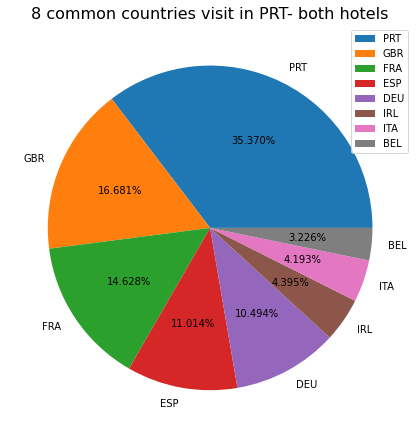

In [ ]:
#take only 8 common country from both of hotels
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(122)
sample = country_data.sort_values('reservation_num',ascending=False).iloc[:8, :]
ax.pie(x = sample['reservation_num'], labels = sample['country'],autopct = '%.3f%%')
ax.legend(labels = sample['country'])
plt.title('8 common countries visit in PRT- both hotels', fontsize=16);


 ## **Question 5.1: What is the ppp of those 8 rare counties?**

 The AVG price for **All** **countries** is 60.

In [ ]:
#the AVG price for ALL countrys is 60
df =  country_data.describe() 
df.style.applymap(lambda x: 'color: red' if x >= 60 and x <=61 else 'color: black')


 + we can see that 8 common countries paid **less** then AVG.

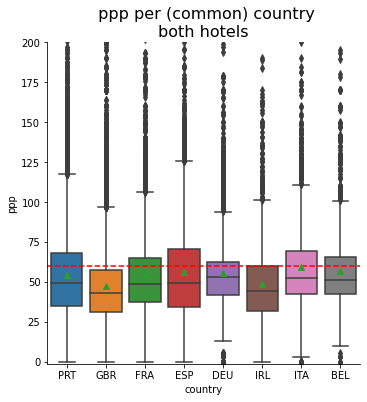

In [ ]:
t= hotel_clean
t[t['ppp']>500]
#t.drop(111403, inplace=True)
t=t.set_index('country', drop=False).loc[sample.index]
sns.catplot(x="country", y="ppp", kind="box", data=t, showmeans=True)
plt.title(' ppp per (common) country\nboth hotels', fontsize=16)
plt.axhline(60, ls='--', c='r')
plt.ylim(-1,200);

##**Question 5.2: Where did peaople come from per hotel? is it the same 8 countries?**

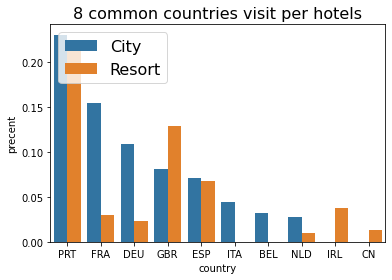

In [ ]:
#Compare the 8 common origin countries for each hotel- 
#City Hotel 
city_data = pd.DataFrame(city_clean["country"].value_counts())
city_data.rename(columns={'country':'reservation_num'}, inplace=True)
city_data['country'] = city_data.index
city_data['precent'] = city_data['reservation_num'] / city_data['reservation_num'].sum()
city_data['ppp_AVG']=city_clean.groupby('country').mean()['ppp']
sample_city = city_data.sort_values('reservation_num',ascending=False).iloc[:8, :]
 
 #Resort
resort_data = pd.DataFrame(resort_clean["country"].value_counts())
resort_data.rename(columns={'country':'reservation_num'}, inplace=True)
resort_data['country'] = resort_data.index
resort_data['precent'] = resort_data['reservation_num'] / city_data['reservation_num'].sum()
resort_data['ppp_AVG']=resort_clean.groupby('country').mean()['ppp']
sample_resort = resort_data.sort_values('reservation_num',ascending=False).iloc[:8, :]

#Show in bar plot the precent of each country per hotel
sample_city['hotel'] = ['City'] * len(sample_city)
sample_resort['hotel'] = ['Resort'] * len(sample_resort)
both = pd.concat([sample_city, sample_resort])
sns.barplot(x="country", y="precent", hue="hotel", data=both, )
plt.title('8 common countries visit per hotels', fontsize=16)
plt.legend( fontsize=16);

##**Question 5.3:** **Is there any country - from both of hotels- that paid constantly high price?** (compare to other) 

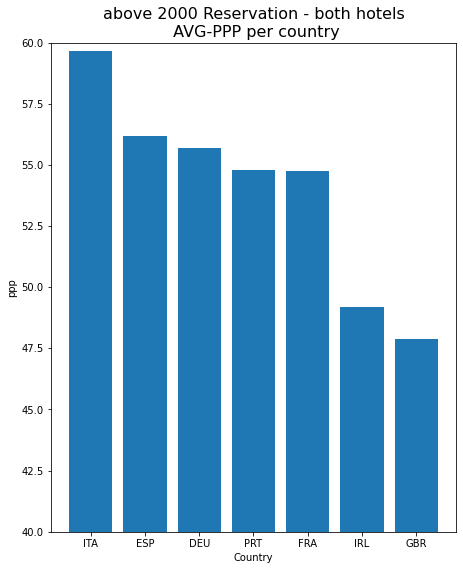

In [ ]:
#there is county with constantly high price?  (it could depend on room type)
rare_country = country_data[country_data['reservation_num']>2000] # more data if we choose  above then 2000 reservation
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(122)
high_price = rare_country.sort_values('ppp_AVG',ascending=False).iloc[:14, :]
ax.set_xlabel('Country')
ax.set_ylabel('ppp')
ax.bar(high_price['country'], high_price['ppp_AVG'])
plt.ylim(40,60)
plt.title('above 2000 Reservation - both hotels\n AVG-PPP per country', fontsize=16);

In [ ]:
#rare_country

+ We can see that ESP has constantly- hoge price compare to PRT and GBR with loe avg ppp. 

the chart include all years 2015-2017

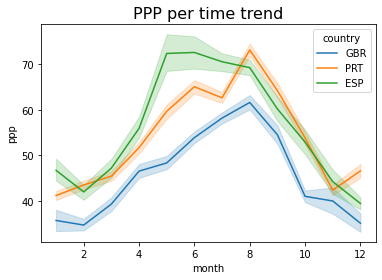

In [ ]:
#For comparison, we want to choose countries that reserved from both of hotels: GBR, PRT, ESP
high= hotel_clean[(hotel_clean['country']=='GBR') |(hotel_clean['country']=='ESP') 
|(hotel_clean['country']=='PRT')]
high= high[['ppp','month','country']]
sns.lineplot(x='month', y='ppp',hue='country', data=high)
plt.title('PPP per time trend', fontsize=16);